#Institución Universitaria Pascual Bravo

#Curso: Reconocimiento de patrones 2024-1

#Docente: Juan Carlos Briñez de León



#Reconocimiento de patrones (Aproximación metodológica)

#1. Obtenbción y preprocesamiento de la información

In [ ]:
#Conectando google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creando lista con directorio de imágenes
import os
path = "/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 5/Copia PR_Letras"
ext_list = [".jpg", ".jpeg", ".png",".bmp"]
list_images = []

#entra a la ruta (path) cuenta cuantos archivos hay y verifica cuantos tienen la extensión que hay en la lista
for file_path in os.listdir(path):
  if os.path.splitext(file_path) [1].lower() in ext_list:
    list_images.append (os.path.join(path, file_path)) #Si es cierto ve agregando la ruta de cada imagen (Nombres)

print(len(list_images))

100


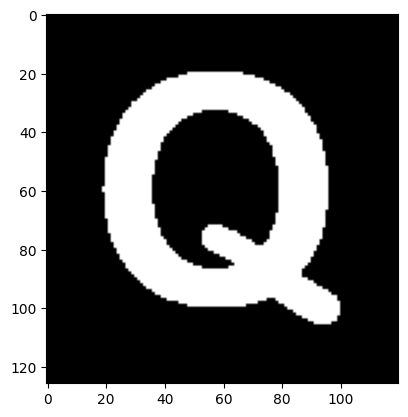

Ingrese el valor de la etiqueta, 0 para J, 1 para Q: 
1


In [ ]:
#Etiquetando los datos
import time
import matplotlib.pyplot as plt
import cv2
from google.colab import output
import numpy as np

Y=np.zeros((len(list_images),1)) # Vector de etiquetas

for i in range(len(list_images)):
  output.clear()
  Img=cv2.imread(list_images[i])
  #Procesando la imagen
  Gris=cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
  Bin = Gris > 100
  [Fl,Cl] = Bin.shape
  plt.imshow(Bin,vmin='0',vmax='1',cmap = 'gray')
  plt.show()
  time.sleep(0.2)
  #Ingresando etiqueta manualmente
  Y[i,0] = int(input('Ingrese el valor de la etiqueta, 0 para J, 1 para Q: \n')) #Debo indicar manualmente si la figura es una Q o es una J

#2. Extracción de características

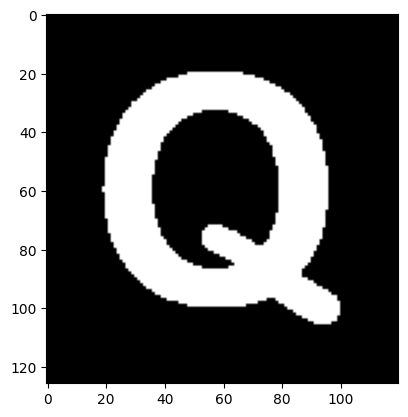

Para esta letra, el área es de:  0.23452380952380952


In [ ]:
#Recorriendo el directorio, midiendo característica de  área
  ##el ÁREA para el profe realmente es el poncentade de área que ocupan los pixeles blancos(letra)
import time
import matplotlib.pyplot as plt
import cv2
from google.colab import output
import numpy as np

X=np.zeros((len(list_images),1)) # Vector de características (Área)

for k in range(len(list_images)):
  output.clear()
  Img=cv2.imread(list_images[k])
  #Procesando la imagen
  Gris=cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
  Bin = Gris > 100
  [Fl,Cl] = Bin.shape
  plt.imshow(Bin,vmin='0',vmax='1',cmap = 'gray')
  plt.show()
  time.sleep(0.2)
  #Midiendo el área de las letras (Cantidad de pixeles ocupados en toda la imagen)
  Contador = 0
  for i in range(Fl):
    for j in range(Cl):
      if Bin[i,j] >0:  #Bin es el valor del pixel, estamos tratando de capturar donde hay datos (blanco)
        Contador+=1

  Area = Contador/(Fl*Cl)
  X[k,0] = Area
  print('Para esta letra, el área es de: ',Area)

#3. Analizando características

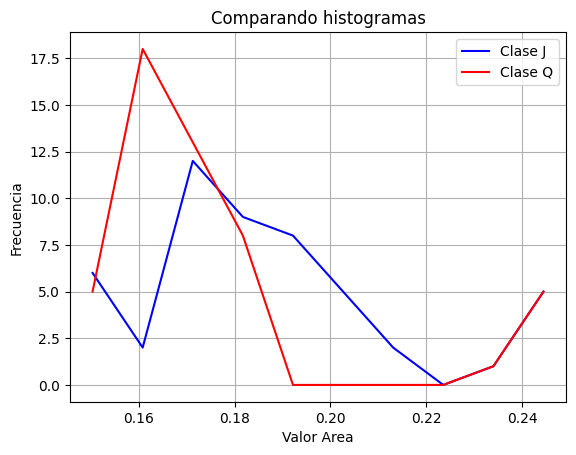

In [ ]:
#Realizando análisis por cada clase
X_1 = []
X_2 = []
for i in range (len(Y)):
  if Y[i]==0:
    X_1.append(X[i]) #Lleno con las J
  else:
    X_2.append(X[i]) #Lleno con las Q

# Crear histograma
X_1 = np.array(X_1)
X_2 = np.array(X_2)
Frecuencia_X_1, bins = np.histogram(X_1,bins=10)
Frecuencia_X_2, bins = np.histogram(X_2,bins=10)

# Grafica el histograma
plt.plot(bins[0:10],Frecuencia_X_1,'-b',label='Clase J')
plt.plot(bins[0:10],Frecuencia_X_2,'-r',label='Clase Q')
plt.legend()
plt.xlabel('Valor Area')
plt.ylabel('Frecuencia')
plt.title('Comparando histogramas')
plt.grid()
plt.show()


#4. Selección de características

In [ ]:
#En este caso no hacemos nada porque solo se tiene una  - Área

#5. Implementando un clasificador

In [ ]:
#Partiendo los datos en entrenamiento y evaluación
from sklearn.model_selection import train_test_split
 #Literatura 80% train y 20% testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Random_state es: siempre haz toma la misma sección aleatoria, esto garantiza que usa los mismos datos en cada corrida con esto se tiene control del experimento

In [ ]:
X.shape

(100, 1)

In [ ]:
#Implementando un clasificador por comparación (KNN)
from sklearn.neighbors import KNeighborsClassifier as KNN


# Inicializar el clasificador KNN
Modelo_knn = KNN(n_neighbors=3)

# Entrenar el clasificador KNN con el conjunto de entrenamiento
Modelo_knn.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

#6. Evaluando desempeño

In [ ]:
#Métricas de evaluación
from sklearn.metrics import accuracy_score

Y_pred = Modelo_knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo KNN:", accuracy)


Precisión del modelo KNN: 0.95


#7. Guardando Modelo entrenado

In [ ]:
# Guardar el modelo entrenado en un archivo
import joblib

joblib.dump(Modelo_knn, '/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 5/Modelo_knn.pkl')

['/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 5/Modelo_knn.pkl']

#8. Utilizando el modelo entrenado para predecir nuevos casos

Saving char_01_008.png to char_01_008.png


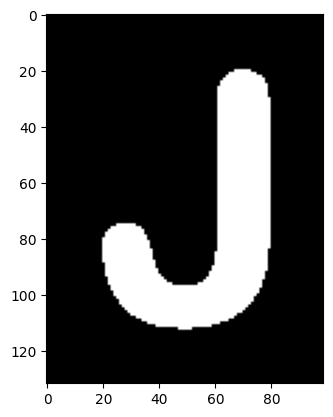

La imagen ingresada corresponde a la letra J


In [ ]:
from google.colab import files
import cv2
import numpy as np


# Cargar el modelo desde el archivo
Modelo_entrenado = joblib.load('/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 5/Modelo_knn.pkl')

# Cargar archivos desde el sistema local
uploaded = files.upload()

# Obtener el nombre del archivo cargado
Nombre_archivo = list(uploaded.keys())[0]

Imagen=cv2.imread(Nombre_archivo)

#Se le debe hacer a la imagen a evaluar exactamente el mismo procesamiento que se le hizo a las imágenes con las que se entrenó
#Procesando la imagen
Gris=cv2.cvtColor(Imagen,cv2.COLOR_BGR2GRAY)
Bin = Gris > 100
[Fl,Cl] = Bin.shape

plt.imshow(Bin,vmin='0',vmax='1',cmap = 'gray')
plt.show()

#Midiendo el área de las letras (Igual que en el entrenamiento)
X_new = np.zeros((1,1))
Contador = 0
for i in range(Fl):
  for j in range(Cl):
    if Bin[i,j] >0:
      Contador+=1

Area = Contador/(Fl*Cl)

X_new[0,0] = Area

# Utilizar el modelo cargado para hacer predicciones
Y_pred_new = Modelo_entrenado.predict(X_new)

if Y_pred_new==0:
  print('La imagen ingresada corresponde a la letra J')
else:
  print('La imagen ingresada corresponde a la letra Q')